## Understanding ROS Nodes

This tutorial introduces ROS graph concepts and discusses the use of `roscore`, `rosnode`, and `rosrun` commandline tools.

Source: [ROS Wiki](http://wiki.ros.org/ROS/Tutorials/UnderstandingNodes)

### Quick Overview of Graph Concepts
* Nodes: A node is an executable that uses ROS to communicate with other nodes.
* Messages: ROS data type used when subscribing or publishing to a topic.
* Topics: Nodes can publish messages to a topic as well as subscribe to a topic to receive messages.
* Master: Name service for ROS (i.e. helps nodes find each other)
* rosout: ROS equivalent of stdout/stderr
* roscore: Master + rosout + parameter server (parameter server will be introduced later)

### roscore

`roscore` is the first thing you should run when using ROS.

In [1]:
%%bash --bg
roscore

Starting job # 0 in a separate thread.


### Using `rosrun`

`rosrun` allows you to use the package name to directly run a node within a package (without having to know the package path).

In [2]:
%%bash --bg
xvfb-run rosrun turtlesim turtlesim_node

Starting job # 2 in a separate thread.


NOTE: The turtle may look different in your turtlesim window. Don't worry about it - there are [many types of turtle](http://wiki.ros.org/Distributions#Current_Distribution_Releases) and yours is a surprise!

In [3]:
%%bash
rosnode list

/turtlesim


In [4]:
import rospy
from turtlesim.msg import Pose
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

import time

prev_pose = None
prev_time = None
t = []
x = []
y = []
theta = []
turtle = plt.imread('images/turtle.png')

def callback(msg):
    global prev_pose
    global prev_time
    current_time = time.time()
    if not prev_pose or \
        msg.linear_velocity != 0.0 or msg.angular_velocity != 0.0 or \
        prev_pose.linear_velocity != 0.0 or prev_pose.angular_velocity != 0.0:
            x.append(msg.x)
            y.append(msg.y)
            theta.append(msg.theta)
            t.append(current_time)
            prev_pose = msg
            if not prev_time or \
                current_time - prev_time > 0.2 or \
                msg.linear_velocity == 0.0 and msg.angular_velocity == 0.0:
                    prev_time = current_time
                    #plt.clf()
                    plt.figure(num=1,figsize=(5,5),dpi=100,facecolor='#4556ff',clear=True)
                    plt.axis('square')
                    plt.axis([0,10,0,10])
                    plt.axis('off')
                    plt.plot(x,y,'.',color='#b3b8ff')
                    plt.figimage(turtle, x[-1], y[-1])
                    display.display(plt.gcf())
                    display.clear_output(wait=True)

In [5]:
rospy.init_node('turtlesim_display', anonymous=True)

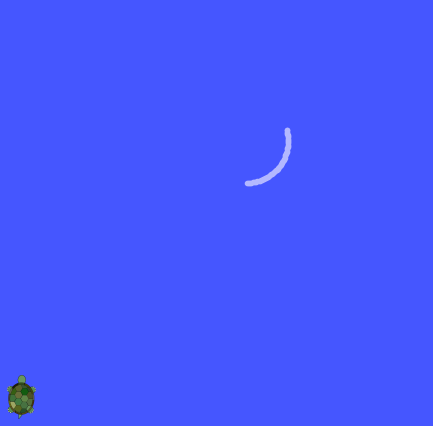

In [6]:
rospy.Subscriber('/turtle1/pose', Pose, callback)
rospy.spin()

In [9]:
turtle = plt.imread('images/turtle.png')

[ 500.  500.]


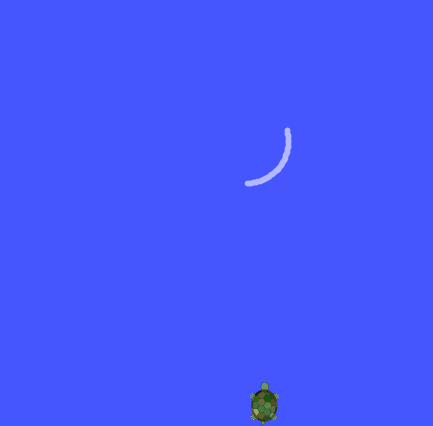

In [27]:
from scipy import ndimage

fig = plt.figure(num=1,figsize=(5,5),dpi=100,facecolor='#4556ff',clear=True)
plt.axis('square')
plt.axis([0,10,0,10])
plt.axis('off')
plt.plot(x,y,'.',color='#b3b8ff')
plt.figimage(turtle, 250, 0)
size = fig.get_size_inches()*fig.dpi # size in pixels
print(size)

In [28]:
from scipy import ndimage
rotated_img = ndimage.rotate(turtle, 60)
plt.imshow(rotated_img)

ImportError: No module named scipy

In [14]:
int(y[-1]*100)

693

### Review
What was covered:

* roscore = ros+core : master (provides name service for ROS) + rosout (stdout/stderr) + parameter server (parameter server will be introduced later)
* rosnode = ros+node : ROS tool to get information about a node.
* rosrun = ros+run : runs a node from a given package.

Now that you understand how ROS nodes work, let's look at how [ROS topics](ROS%20Topics.ipynb) work.